In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [2]:
# Path to the folder containing your CSV files
csv_folder_path = 'C:\VS CODE\ML\MachineLearning\predictStockPrices\stocks'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

# Load all CSVs into a list of DataFrames
dfs = []
for file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder_path, file))
    df['Stock'] = file.split('.')[0]  # Add a 'Stock' column to identify which stock the data belongs to
    dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# View the combined data
print(combined_df.head())
# print(combined_df)

         Date       Open       High        Low      Close  Adj Close  \
0  1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665   
1  1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577   
2  1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   
3  1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   
4  1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   

       Volume Stock  
0  62546300.0     A  
1  15234100.0     A  
2   6577800.0     A  
3   5975600.0     A  
4   4843200.0     A  


In [3]:
print(combined_df)

                Date       Open       High        Low      Close  Adj Close  \
0         1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665   
1         1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577   
2         1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   
3         1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   
4         1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   
...              ...        ...        ...        ...        ...        ...   
24197437  2020-03-26  10.230000  11.430000  10.230000  11.100000  11.100000   
24197438  2020-03-27  10.700000  10.980000  10.060000  10.300000  10.300000   
24197439  2020-03-30  10.160000  11.060000  10.160000  10.800000  10.800000   
24197440  2020-03-31  10.680000  11.140000  10.590000  11.070000  11.070000   
24197441  2020-04-01  11.160000  11.160000  10.510000  10.920000  10.920000   

              Volume Stock  
0         62546300.0  

In [3]:

X, y = make_classification(
    n_samples=1000,
    n_features=7,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [6]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

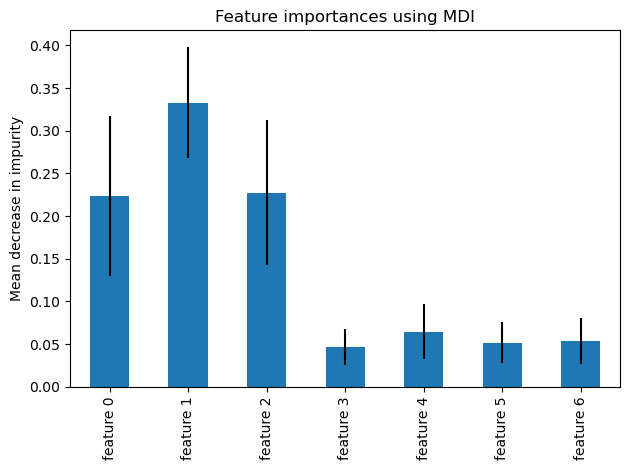

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [5]:

combined_df["Tomorrow"] = combined_df["Close"].shift(-1)
combined_df["Target"] = (combined_df["Tomorrow"] > combined_df["Close"]).astype(int)

In [8]:
# Splitting train and test data
train = combined_df.iloc[:-100]
test = combined_df.iloc[-100:]

# Features to use for stock prediction
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Train the RandomForest model on the stock data
model_rf = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# Train the RandomForestClassifier after filling NaN values
model_rf.fit(train[predictors], train["Target"])
model_rf.fit(train[predictors], train["Target"])

# Now we add the HistGradientBoostingClassifier to handle missing values
model_hgb = HistGradientBoostingClassifier(random_state=1)

# Train HistGradientBoostingClassifier (it handles missing values natively)
model_hgb.fit(train[predictors], train["Target"])

# Model predictions
rf_predictions = model_rf.predict(test[predictors])
hgb_predictions = model_hgb.predict(test[predictors])

# Print some results (this is just an example)
print("RandomForestClassifier Predictions:", rf_predictions[:10])
print("HistGradientBoostingClassifier Predictions:", hgb_predictions[:10])

KeyboardInterrupt: 

In [ ]:
#next step - clean data, choose features, make target, train on features, predict target based on model